<a href="https://colab.research.google.com/github/MeenuVis/Machine-Learning/blob/main/OCT%20image%20classification%20using%20depthwise%20separable%20convolution%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Input,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import os
import cv2
import numpy as np
from skimage.io import imread, imsave,imshow
from skimage.morphology import disk, square
from skimage.filters.rank import median, threshold, otsu
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report, accuracy_score

In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import backend as K
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
 
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
!cp -r /content/drive/My\ Drive/oct/OCT2017/train /content/

cp: cannot access '/content/drive/My Drive/oct/OCT2017/train/DRUSEN': Input/output error
cp: cannot access '/content/drive/My Drive/oct/OCT2017/train/NORMAL': Input/output error
^C


In [ ]:
!cp -r /content/drive/My\ Drive/oct/OCT2017/test /content/

In [ ]:
 image_size=224
batch_size=200
epochs=3
num_classes=4
data_path='/content/drive/My Drive/oct/OCT2017/train'
test_path='/content/test'

In [ ]:
from multiprocessing import Pool
from multiprocessing import cpu_count
import os
import cv2
import numpy as np
from skimage.io import imread, imsave,imshow
from skimage.morphology import disk, square
from skimage.filters.rank import median, threshold, otsu
from scipy import ndimage, misc
def preprocess(i):
            med = ndimage.median_filter(i, size=3)
            # local_otsu = otsu(med,  disk(3))
            t = med >= 255*0.3
            return med
 
import numpy as np
path='/content/test'
pool = Pool(10)
i = []
for root, dirs, files in os.walk(path):
    for name in files:
        fi = root+'/'+name
        #fi=cvtColor(fi,cv2.COLOR_BGR2RGB)
        print(fi)
        
        if name.endswith((".jpg", ".jpeg")):
            i = imread(fi, as_gray= True)
            results = pool.map(preprocess, i)
            results = np.array(results, dtype=np.uint8)
            print(imsave(fi, results)  )
 
pool.close()  # 'TERM'
pool.join()   # 'KILL'

/content/test/DME/DME-3791742-1.jpeg
None
/content/test/DME/DME-7793366-1.jpeg
None
/content/test/DME/DME-7763916-1.jpeg
None
/content/test/DME/DME-9378346-3.jpeg
None
/content/test/DME/DME-462675-1.jpeg
None
/content/test/DME/DME-8525575-6.jpeg
None
/content/test/DME/DME-8525575-2.jpeg
None
/content/test/DME/DME-8000885-1.jpeg
None
/content/test/DME/DME-30521-10.jpeg
None
/content/test/DME/DME-8136649-1.jpeg
None
/content/test/DME/DME-9066695-1.jpeg
None
/content/test/DME/DME-70266-3.jpeg
None
/content/test/DME/DME-7027665-1.jpeg
None
/content/test/DME/DME-7972888-1.jpeg
None
/content/test/DME/DME-778975-1.jpeg
None
/content/test/DME/DME-6314020-1.jpeg
None
/content/test/DME/DME-9378346-1.jpeg
None
/content/test/DME/DME-8130267-1.jpeg
None
/content/test/DME/DME-306172-1.jpeg
None
/content/test/DME/DME-7928636-1.jpeg
None
/content/test/DME/DME-8615417-1.jpeg
None
/content/test/DME/DME-30521-5.jpeg
None
/content/test/DME/DME-1102486-2.jpeg
None
/content/test/DME/DME-4336607-1.jpeg
None


In [ ]:


train_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(test_path,target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    ) # set as training data




test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_path,target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 1000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
model=Sequential()
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import Nadam, Adam
from tensorflow.keras.losses import categorical_crossentropy,mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPooling2D,Dropout, Flatten, GlobalAveragePooling2D, add, SeparableConv2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l2
a = Input(shape=(224, 224, 3))
b1 = SeparableConv2D(16, (3,3), strides=(1, 1), padding='same', data_format=None)(a)
b = Conv2D(32, (3,3), strides=(1, 1), padding='valid', data_format=None)(a)
#b = Conv2D(32,(3,3), strides=(1, 1), padding='valid', data_format=None)(b)
b = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(b)
b2 = SeparableConv2D(16,(3,3), strides=(1, 1), padding='same',data_format=None)(b1)

b4 = SeparableConv2D(16,(3,3), strides=2, padding='same', data_format=None)(b2)
b3 = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(b1)

added = add([b4, b3])

b = MaxPooling2D(pool_size=(2,2),strides=2, padding='valid', data_format=None)(added)
#b = Conv2D(128,(3,3), strides=(1,1), padding='valid', data_format=None)(b)
b = SeparableConv2D(32,(3,3), strides=(1,1), padding='valid',data_format=None)(b)
b = MaxPooling2D(pool_size=(2,2),strides=2,padding='valid',data_format=None)(b)
b = SeparableConv2D(64,(3,3),strides=(1,1), padding='valid',data_format=None)(b)
#b = Conv2D(256,(3,3),strides=(1,1),padding='valid',data_format=None)(b)
#b = Conv2D(256,(3,3),strides=(1,1),padding='valid',data_format=None)(b)
b = GlobalAveragePooling2D(data_format='channels_first')(b)
# b = MaxPooling2D(pool_size=(2,2),strides=2,data_format=None)(b)
b = Dense(4096,activation='relu')(b)
# b=Flatten(input_shape=(1, 1))(b)
b = Dropout(rate =0.5)(b)
f = Dense(4,activation='softmax')(b)

model = Model(inputs=a,outputs=f)
                              
model.summary()
opt=Nadam(lr=.01)
model.compile(loss=categorical_crossentropy, optimizer=opt,metrics=['accuracy'])


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
separable_conv2d (SeparableConv (None, 224, 224, 16) 91          input_1[0][0]                    
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 224, 224, 16) 416         separable_conv2d[0][0]           
__________________________________________________________________________________________________
separable_conv2d_2 (SeparableCo (None, 112, 112, 16) 416         separable_conv2d_1[0][0]         
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.models import load_model
#from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "/content/drive/My Drive/train_ckpt/cp.ckpt"
filepath="/content/drive/My Drive/saveweights_balanced_cnn_5layered_best7.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True, save_weights_only=True, verbose=1)
cp_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_path, verbose=1, save_weights_only=True,save_freq=5)
 
# Train the network
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = test_generator,
                              validation_steps = test_generator.samples // batch_size,
                              epochs = 50, 
                              callbacks=cp_callback,
#                               class_weight=class_weights
                             )
#model.save(filepath,include_optimizer=True)

Epoch 1/50
4/5 [=======================>......] - ETA: 1s - loss: 1.2399 - accuracy: 0.5675
Epoch 00001: saving model to /content/drive/My Drive/train_ckpt/cp.ckpt
5/5 [==============================] - 10s 2s/step - loss: 1.3275 - accuracy: 0.5210 - val_loss: 1.1234 - val_accuracy: 0.5320
Epoch 2/50
4/5 [=======================>......] - ETA: 1s - loss: 1.0255 - accuracy: 0.5863
Epoch 00002: saving model to /content/drive/My Drive/train_ckpt/cp.ckpt
5/5 [==============================] - 9s 2s/step - loss: 0.9926 - accuracy: 0.6100 - val_loss: 0.7884 - val_accuracy: 0.6670
Epoch 3/50
4/5 [=======================>......] - ETA: 1s - loss: 0.8877 - accuracy: 0.6300
Epoch 00003: saving model to /content/drive/My Drive/train_ckpt/cp.ckpt
5/5 [==============================] - 10s 2s/step - loss: 0.9257 - accuracy: 0.6040 - val_loss: 0.8873 - val_accuracy: 0.6140
Epoch 4/50
4/5 [=======================>......] - ETA: 1s - loss: 0.8289 - accuracy: 0.6350
Epoch 00004: saving model to /conten

In [ ]:
 model_json = model.to_json()
with open("model_baseline.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // batch_size) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
 
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# This function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
 
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
 
# list of epoch numbers
x = list(range(00,epochs+2))
 
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)




Test Loss: 0.1823834478855133
Test accuracy: 0.9359999895095825


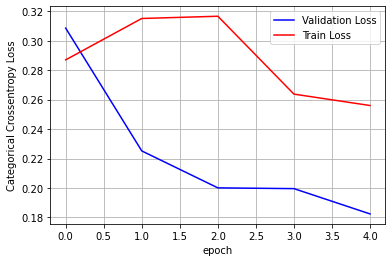

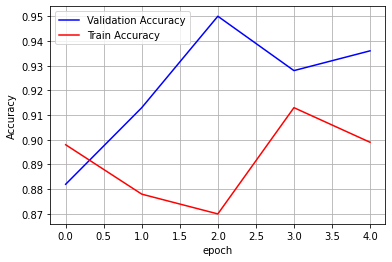

In [ ]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // batch_size) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
history = history.history
x = list(range(00,epochs+2))
_,ax1 = plt.subplots(1,1)
ax1.plot(x, history['val_loss'], 'b', label="Validation Loss")
ax1.plot(x, history['loss'], 'r', label="Train Loss")
ax1.set_xlabel('epoch') 
ax1.set_ylabel('Categorical Crossentropy Loss')
plt.legend()
plt.grid()
_,ax2 = plt.subplots(1,1)
ax2.plot(x, history['val_accuracy'], 'b', label="Validation Accuracy")
ax2.plot(x, history['accuracy'], 'r', label="Train Accuracy")
ax2.set_xlabel('epoch') 
ax2.set_ylabel('Accuracy')
plt.legend()
plt.grid()

In [ ]:
 
def load_test_data(folder):
    """
    Function to load the images and labels.
    """
    Image = []
    Label = []
    
    for folder_name in os.listdir('/content/test/'):
        # Reading the labels.
        if not folder_name.startswith('.'):
            if folder_name in ['CNV']:
                label = 0
            elif folder_name in ['DME']:
                label = 1
            elif folder_name in ['DRUSEN']:
                label = 2
            elif folder_name in ['NORMAL']:
                label = 3
            else:
                label = 4
            for image_file_name in tqdm(os.listdir(folder + folder_name)):
                # Reading the images.
                image_file = cv2.imread(folder + folder_name + '/' + image_file_name)
                if image_file is not None:
                    # Converting images into array.
                    image_file = skimage.transform.resize(image_file, (image_size, image_size, 3))
                    image_array = np.asarray(image_file)
                    Image.append(image_array)
                    Label.append(label)
    Image = np.asarray(Image)
    Label = np.asarray(Label)
    return Image,Label

In [ ]:

X_test,Y_test=load_test_data("/content/test/")

100%|██████████| 250/250 [00:07<00:00, 35.21it/s]


In [ ]:


from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/saveweights_balanced_cnn_5layered_best7.hdf5')

In [ ]:

pred_datagen = ImageDataGenerator()

pred_generator = pred_datagen.flow_from_directory("/content/test/",target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)

Found 1000 images belonging to 4 classes.


In [ ]:
y_pred = model.predict_generator(pred_generator,steps = 1000)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
Y_pred = np.argmax(y_pred,axis = 1)

In [ ]:

import pickle
with open('y_pred_baseline_model.pkl','wb') as f:
    pickle.dump(y_pred, f)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

--------------------
| Confusion Matrix |
--------------------

 [[232   4  14   0]
 [  0 245   2   3]
 [ 11   8 225   6]
 [  1   5   4 240]]


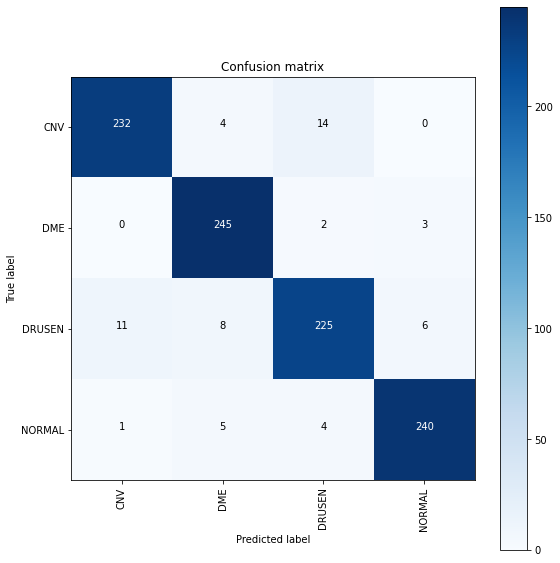

In [ ]:
#confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.95      0.93      0.94       250
         DME       0.94      0.98      0.96       250
      DRUSEN       0.92      0.90      0.91       250
      Normal       0.96      0.96      0.96       250

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

